<a href="https://colab.research.google.com/github/vutl/Heart-Desease-Prediction/blob/feature%2Fheart-desease/HeartDeseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

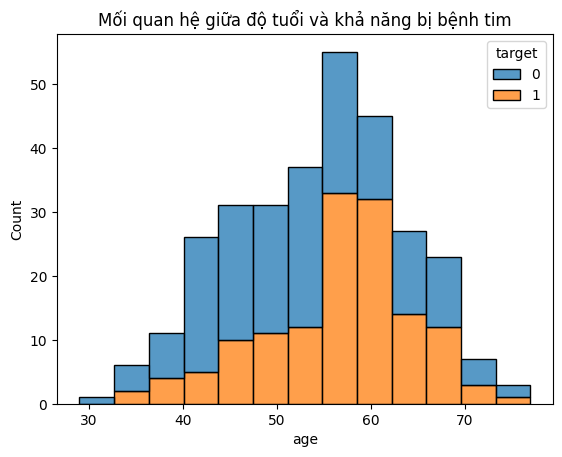

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tập tin
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Mapping target để gộp nhóm
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị thiếu cho các cột 'thal' và 'ca'
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Vẽ biểu đồ phân phối của độ tuổi và khả năng bị bệnh tim
sns.histplot(data=df, x='age', hue='target', multiple='stack')
plt.title('Mối quan hệ giữa độ tuổi và khả năng bị bệnh tim')
plt.show()

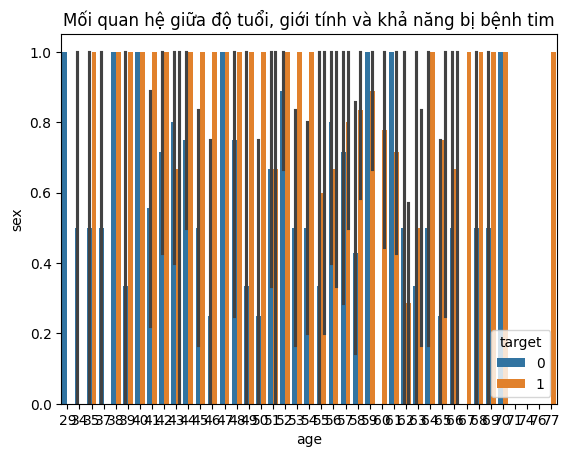

In [3]:
# Vẽ biểu đồ barplot với độ tuổi, giới tính và khả năng bị bệnh tim
sns.barplot(data=df, x='age', y='sex', hue='target')
plt.title('Mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM với kernel là 'rbf'
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train}')
print(f'Accuracy for test set for Naive Bayes = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Decision Tree với các tham số
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Decision Tree = {accuracy_for_train}')
print(f'Accuracy for test set for Decision Tree = {accuracy_for_test}')

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.72


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest với các tham số
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Random Forest = {accuracy_for_train}')
print(f'Accuracy for test set for Random Forest = {accuracy_for_test}')

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Adaboost với các tham số
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Adaboost = {accuracy_for_train}')
print(f'Accuracy for test set for Adaboost = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình GradientBoost với các tham số
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoost = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoost = {accuracy_for_test}')

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình XGBoost với các tham số
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGBoost = {accuracy_for_train}')
print(f'Accuracy for test set for XGBoost = {accuracy_for_test}')

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các mô hình thành phần (base learners)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ada = AdaBoostClassifier(random_state=42)

# Tạo mô hình Stacking với các mô hình thành phần và bộ phân loại cuối cùng
stack = StackingClassifier(
    estimators=[
        ('dtc', dtc),
        ('rfc', rfc),
        ('knn', knn),
        ('xgb', xgb),
        ('gbc', gc),
        ('svc', svc),
        ('ada', ada)
    ],
    final_estimator=RandomForestClassifier(random_state=42)
)

# Huấn luyện mô hình Stacking
stack.fit(X_train, y_train)

# Dự đoán và tính độ chính xác
y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Stacking = {accuracy_for_train}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.99
Accuracy for test set for Stacking = 0.9
